<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

# <center>Regression Method on CEO Salary Data </center>

# Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Data Formatting and Preprocessing    </a></li>
<li><a href="#ref1"> Data Analysis</a></li>
<li><a href="#ref3">  Data Exploration </a></li>

<li><a href="#ref4"> Creating a Model </a></li>



</div>

 In this dataset, we will predict CEO pay using features such as the age of the CEO, company profits and sales. The dataset is from the Wisconsin School of Business's Regression and Modeling with Actual and Finance Applications  Datasets: 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

 Let's load the dataset using Pandas:

In [2]:
file_name='https://ibm.box.com/shared/static/worxgoibhvr53yccwmwx71iuly491h6u.csv'
df=pd.read_csv(file_name)
df.head()

,COMP,AGE,EDUCATN,BACKGRD,TENURE,EXPER,SALES,VAL,PCNTOWN,PROF,COMPANY,BIRTH
0,1948,55,1,1,23,23.0,1227,7.6,0.55,145,AdvM,chi
1,809,59,1,2,38,0.5,19196,0.4,0.01,505,aetna,chi
2,721,53,2,1,26,0.5,839,1.5,0.10,-60,aller,sanf
3,2027,62,2,2,25,5.0,8379,3.4,0.04,806,amer,vertx
4,2094,63,1,3,41,8.0,10818,5.9,0.04,1166,ameri,bigrun


## <a id="ref0"></a> Data Formatting and Preprocessing  


 Let us re-scale the data:

In [3]:
df["COMP"]=1000*df["COMP"]
df["PROF"]=1000000*df["PROF"]

In [4]:
df.head()

,COMP,AGE,EDUCATN,BACKGRD,TENURE,EXPER,SALES,VAL,PCNTOWN,PROF,COMPANY,BIRTH
0,1948000,55,1,1,23,23.0,1227,7.6,0.55,145000000,AdvM,chi
1,809000,59,1,2,38,0.5,19196,0.4,0.01,505000000,aetna,chi
2,721000,53,2,1,26,0.5,839,1.5,0.10,-60000000,aller,sanf
3,2027000,62,2,2,25,5.0,8379,3.4,0.04,806000000,amer,vertx
4,2094000,63,1,3,41,8.0,10818,5.9,0.04,1166000000,ameri,bigrun


Let's see the number of samples and features:

In [5]:
df.shape

(100, 12)

We have 100 samples, 11 features and one target. 

 Let's look at the different data types:

In [6]:
df.dtypes

COMP         int64
AGE          int64
EDUCATN      int64
BACKGRD      int64
TENURE       int64
EXPER      float64
SALES        int64
VAL        float64
PCNTOWN    float64
PROF         int64
COMPANY     object
BIRTH       object
dtype: object

The columns **COMPANY** and **BIRTH** are not numerical. 

 Let’s see if we have missing data:

In [7]:
df.isnull().values.sum()

1

We have one missing data point, we can just drop the row using the method **dropna**.
Don’t forget if you don’t set the parameter **inplace** to **True** the dataframe will not change. 


In [8]:
df.dropna(axis=0, inplace=True)

We can verify that there is no missing data:  


In [9]:
df.isnull().values.sum()

0

## <a id="#ref2"> </a> Data Analysis

Let us get the summary statistics:

In [10]:
df.describe()

,COMP,AGE,EDUCATN,BACKGRD,TENURE,EXPER,SALES,VAL,PCNTOWN,PROF
count,9.900000e+01,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01
mean,1.124879e+06,56.949495,1.555556,4.959596,23.878788,8.949495,4117.676768,47.706061,1.774444,1.383939e+08
std,8.564561e+05,6.206274,0.609821,2.721491,12.460773,8.312609,4717.194561,186.564716,4.655538,3.440305e+08
min,1.550000e+05,37.000000,0.000000,1.000000,1.000000,0.500000,228.000000,0.100000,0.010000,-1.086000e+09
25%,5.750000e+05,52.500000,1.000000,3.000000,13.500000,2.500000,1275.000000,0.850000,0.040000,1.200000e+07
50%,8.090000e+05,58.000000,2.000000,5.000000,27.000000,6.000000,2344.000000,3.600000,0.160000,8.200000e+07
75%,1.458500e+06,61.500000,2.000000,7.000000,35.000000,12.000000,4408.000000,12.300000,0.755000,2.275000e+08
max,4.657000e+06,74.000000,2.000000,10.000000,46.000000,35.000000,21351.000000,1689.000000,34.040001,1.618000e+09


 Let’s see the most popular birth places  of the CEO’s  using the method  **value_counts()**, just a note **[0:10].plot(kind='bar')** will only take the top ten values and plot a bar graph.

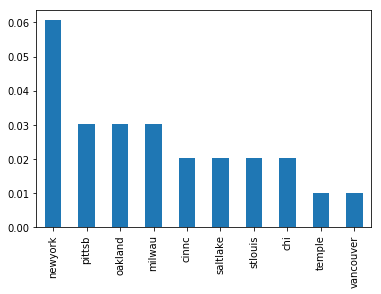

In [11]:
df['BIRTH'].value_counts(normalize=True)[0:10].plot(kind='bar')

We see 6% of the CEOs are from New York.


 In this Lab we will not use categorical features so will drop the columns using the method **drop **, let’s see the dataframe before we drop the columns. 


In [12]:
df.head()

,COMP,AGE,EDUCATN,BACKGRD,TENURE,EXPER,SALES,VAL,PCNTOWN,PROF,COMPANY,BIRTH
0,1948000,55,1,1,23,23.0,1227,7.6,0.55,145000000,AdvM,chi
1,809000,59,1,2,38,0.5,19196,0.4,0.01,505000000,aetna,chi
2,721000,53,2,1,26,0.5,839,1.5,0.10,-60000000,aller,sanf
3,2027000,62,2,2,25,5.0,8379,3.4,0.04,806000000,amer,vertx
4,2094000,63,1,3,41,8.0,10818,5.9,0.04,1166000000,ameri,bigrun


We drop the columns and view the results :

In [13]:
df=df.drop(labels=["COMPANY","BIRTH"], axis=1)
df.head()

,COMP,AGE,EDUCATN,BACKGRD,TENURE,EXPER,SALES,VAL,PCNTOWN,PROF
0,1948000,55,1,1,23,23.0,1227,7.6,0.55,145000000
1,809000,59,1,2,38,0.5,19196,0.4,0.01,505000000
2,721000,53,2,1,26,0.5,839,1.5,0.10,-60000000
3,2027000,62,2,2,25,5.0,8379,3.4,0.04,806000000
4,2094000,63,1,3,41,8.0,10818,5.9,0.04,1166000000


## <a id='ref3'></a> Data Exploration 

In [14]:
import seaborn as sns

 Let’s examine the distribution of the data:  


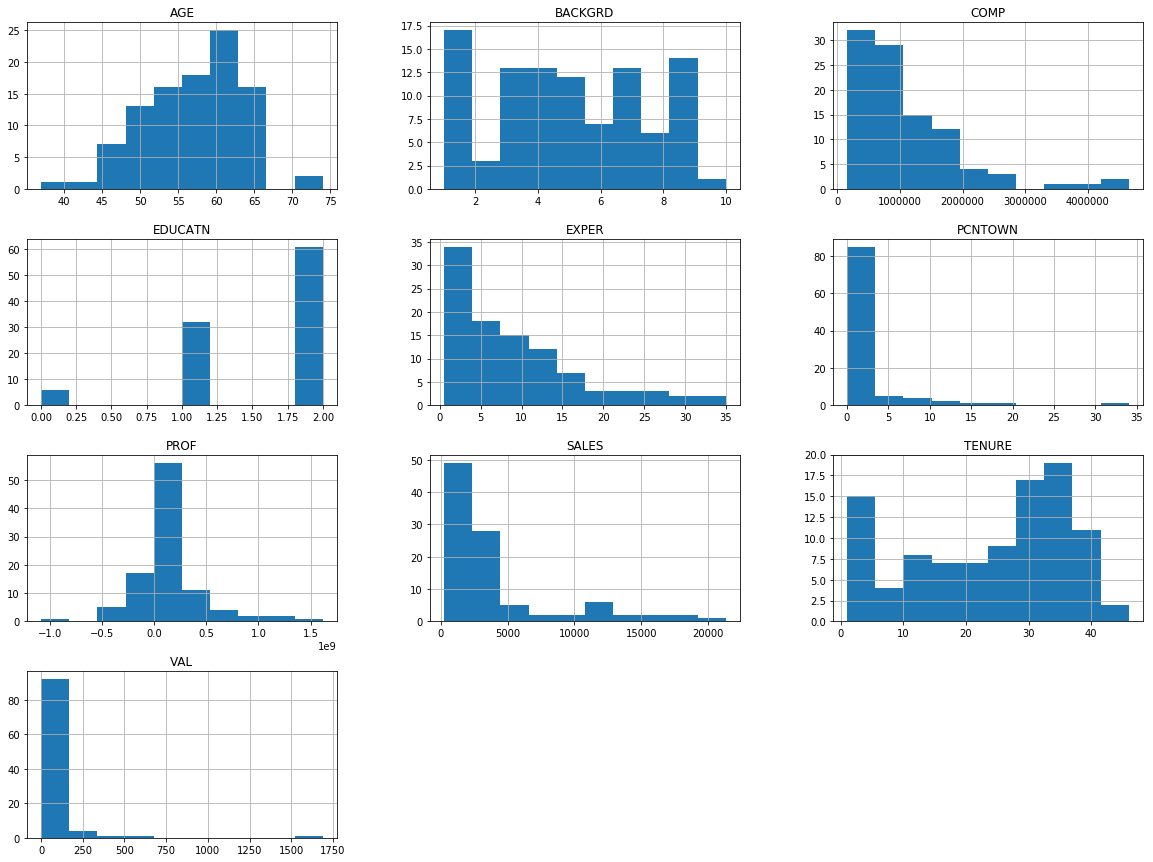

In [15]:
df.hist(bins=10, figsize=(20,15))
plt.show()

We can view the correlation between the variables;

In [16]:
corr=df.corr()
corr

,COMP,AGE,EDUCATN,BACKGRD,TENURE,EXPER,SALES,VAL,PCNTOWN,PROF
COMP,1.000000,0.151334,-0.295490,-0.173020,0.217544,0.226651,0.374019,0.029302,-0.124839,0.374252
AGE,0.151334,1.000000,-0.237858,-0.122762,0.407107,0.408289,0.086256,-0.056541,-0.059366,0.129604
EDUCATN,-0.295490,-0.237858,1.000000,-0.010931,-0.264988,-0.233950,-0.110699,-0.095065,-0.242444,-0.090791
BACKGRD,-0.173020,-0.122762,-0.010931,1.000000,-0.106664,0.062831,-0.080802,0.188867,0.253175,-0.189782
TENURE,0.217544,0.407107,-0.264988,-0.106664,1.000000,0.391971,0.282398,0.064759,0.142685,0.279963
EXPER,0.226651,0.408289,-0.233950,0.062831,0.391971,1.000000,-0.071970,0.297009,0.338720,0.076616
SALES,0.374019,0.086256,-0.110699,-0.080802,0.282398,-0.071970,1.000000,-0.013182,-0.129747,0.395860
VAL,0.029302,-0.056541,-0.095065,0.188867,0.064759,0.297009,-0.013182,1.000000,0.782573,0.094131
PCNTOWN,-0.124839,-0.059366,-0.242444,0.253175,0.142685,0.338720,-0.129747,0.782573,1.000000,-0.047327
PROF,0.374252,0.129604,-0.090791,-0.189782,0.279963,0.076616,0.395860,0.094131,-0.047327,1.000000


Let us view the correlation with a heat map:

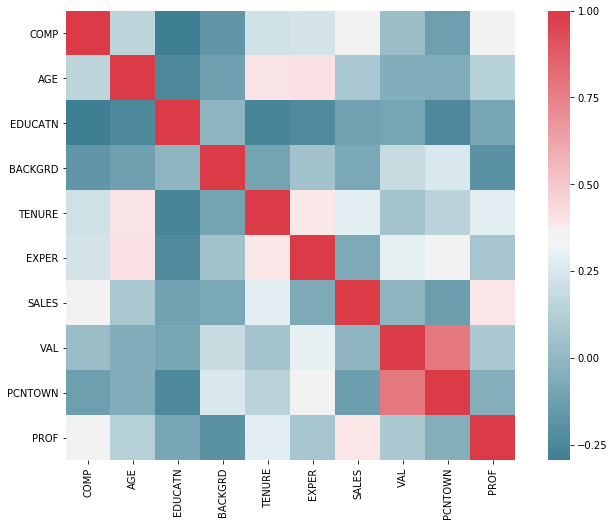

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True)
plt.show()

### <a id='ref4'></a> Creating a Model 


 We will need the following modules to build and test the model: 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

 Let’s create a linear regression object:  


In [19]:
lr = linear_model.LinearRegression(normalize=True)

We extract the target data:

In [20]:
y=df[["COMP"]]

In [21]:
X=df.drop(labels="COMP", axis=1)

We split the data into a training and testing set: 

In [22]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.33,random_state=0)

We can fit the model and calculate the R^2:

In [23]:
lr.fit(X_train[["PROF"]],y_train)
lr.score(X_test[["PROF"]], y_test)

0.05390979388924578

We can make a prediction:

In [24]:
yhat=lr.predict(X_test[['PROF']])
yhat[0:5]

array([[1032847.54697765],
       [1018699.47908082],
       [ 962814.61088836],
       [1043812.29959769],
       [1025773.51302924]])

 We can find the intercept and the coefficient: 

In [25]:
lr.intercept_

array([984036.7127336])

In [26]:
lr.coef_

array([[0.0003537]])

We can calculate the R^2 for every feature:   

In [27]:
Feature_Name=[]
Feature_Rsq=[]

for name in list(X):
    lr.fit(X_train[[name]], y_train)
    lr.score(X_test[[name]], y_test)
    Feature_Rsq.append(lr.score(X_test[[name]], y_test))

The following plot shows correlation and R^2  for the different features. We see a larger correlation implies a larger R^2.      


/Users/bulent/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


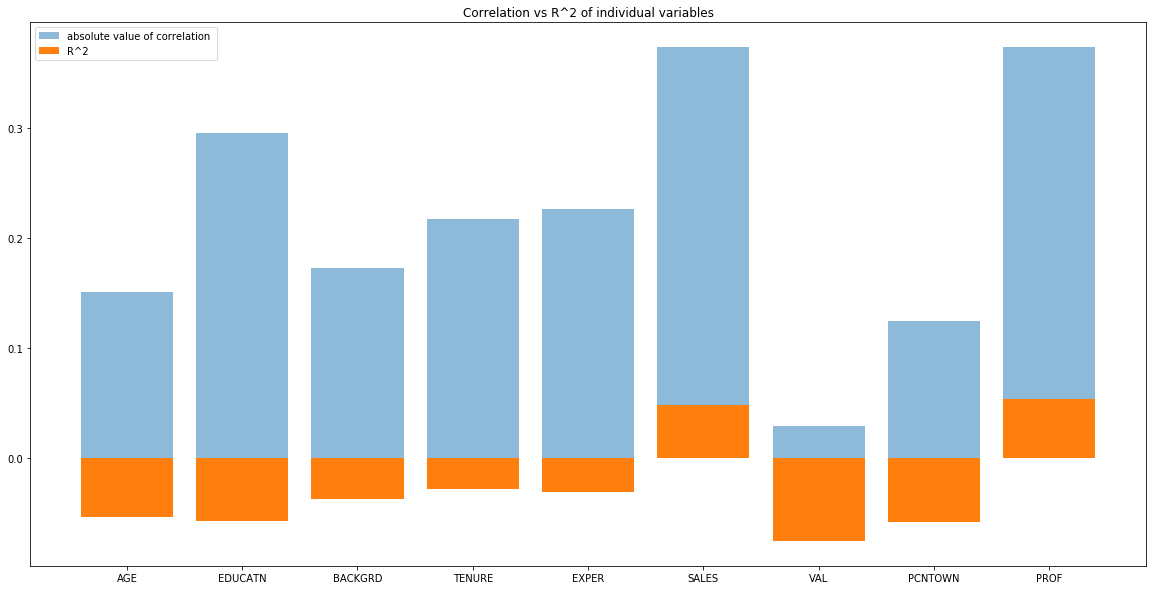

In [28]:
x_ax=np.arange(len(list(X)))
x_ax

plt.figure(figsize=(20,10))

plt.bar(x_ax, np.abs(corr.ix['COMP',1:].values), align='center', alpha=0.5,label='absolute value of correlation ')
plt.bar(x_ax, Feature_Rsq, align='center',label='R^2')
plt.xticks(x_ax, list(X))

plt.legend()

plt.title('Correlation vs R^2 of individual variables')
plt.show()

 We can use multiple linear regression as well. This leads to a higher R^2.

## Multiple Linear Regression

 We can also use multiple linear regression, the R^2 is approximately 0.155.

In [31]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.15481178748651514

 We can make a prediction:

In [32]:
yhat=lr.predict(X_test)
yhat[0:5]

array([[ 562458.34472309],
       [ 749644.13998889],
       [ 499093.87868935],
       [1035118.30347602],
       [1643937.05383063]])

## Polynomial Features

 We can use Polynomial Features, the function has the form:

 \begin{equation*}
yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
\end{equation*}

We import **PolynomialFeatures**  from the module **preprocessing**:

In [33]:
from sklearn.preprocessing import PolynomialFeatures

 We create a polynomial features object:


In [34]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

We transform the data:

In [35]:
Z_test=pr.fit_transform(X_test)
Z_train=pr.fit_transform(X_train)

 We can fit the model and calculate the R^2:

In [36]:
lr.fit(Z_train, y_train)
lr.score(Z_test, y_test)

-108.39278589280669

 We can make a prediction:


In [37]:
yhat=lr.predict(Z_test)
yhat[0:4]

array([[  691200.],
       [-1237248.],
       [  397568.],
       [ 1284352.]])

We see a negative R^2, this implies overfitting, we can use Ridge Regression to help remedy this.


## Ridge Regression

 We import ** Ridge** from the module **linear_model**:

In [38]:
from sklearn.linear_model import Ridge

 We create a Ridge Regression object and fit the model:

In [39]:
rr = Ridge(alpha=0.1,normalize=True)
rr.fit(X, y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

 We calculate the R^2:

In [40]:

rr.score(X_test, y_test)

0.3405548258895231

We test the R^2  for different Alpha: 

In [41]:
Alpha=[0.001, 0.001,0.01,0.1,1]
Rsq_ridge=[]
for a in Alpha:
    rr = Ridge(alpha=a,normalize=True)
    rr.fit(X_train, y_train)
    print(rr.score(X_test, y_test))
    Rsq_ridge.append(rr.score(X_test, y_test))

0.15467618605519184
0.15467618605519184
0.15349326092243554
0.1439430098716279
0.08561448674277528


The max R^2 is 0.155,  we can plot out the R^2:

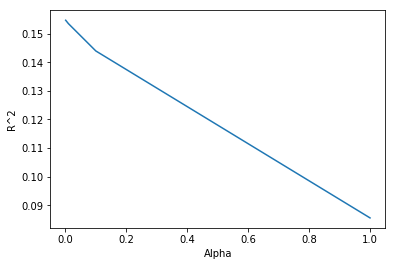

In [42]:
plt.plot(Alpha,Rsq_ridge)
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.show()

 We can perform the same set of operations with polynomial features:  


In [43]:
Rsq_ridge_poly=[]

for a in Alpha:
    clf = Ridge(alpha=a,normalize=True)
    clf.fit(Z_train, y_train)

    Rsq_ridge_poly.append(clf.score(Z_test, y_test))

 We can plot out the R^2 for different values of Alpha: 

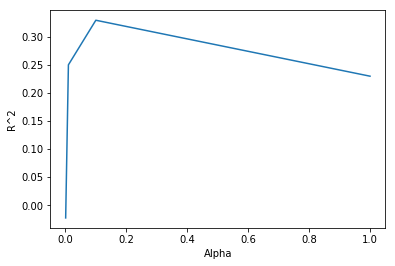

In [44]:
plt.plot(Alpha,Rsq_ridge_poly)
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.show()

 The max value of R^2 is approximately 0.33:

In [45]:
max(Rsq_ridge_poly)

0.3294061367808033

#### About the Authors:  

[Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.